In [4]:
"""
Author: Runyao Yu
runyao.yu@tum.de
Research Internship in ETH Zurich
For Academic Use Purpose only
"""

# Basics + Viz
import time
import datetime
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

# Pre-processing
from transformers import BertTokenizer

# Suppress warnings
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)

In [ ]:
df = pd.read_excel('/content/raw_data.xlsx')
df.head()

,content,想要认识对方,想要获得更多信息,表达情感见解看法，分享过往经历,和博主互动,情感恋爱,社交朋友,性,外貌长相身材,地理位置,个人信息,与以上均无关,日常生活,教育和职业
0,准大一[捂脸],NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,弟弟是在广东吗，啊哈哈哈哈哈哈哈,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,同是准大二哈哈[赞同],NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,哈哈哈哈哈哈哈，还有一段时间呢！,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,无1无靠[捂脸],NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
text = df['content'].tolist()
df = df.drop(['content'],axis=1)
df = df.fillna(0)
df = df.apply(lambda x: pd.factorize(x)[0])
df['text'] = text
df.head()

,想要认识对方,想要获得更多信息,表达情感见解看法，分享过往经历,和博主互动,情感恋爱,社交朋友,性,外貌长相身材,地理位置,个人信息,与以上均无关,日常生活,教育和职业,text
0,0,0,0,0,0,0,0,0,0,0,0,0,0,准大一[捂脸]
1,0,1,0,1,0,0,0,0,1,0,0,0,1,弟弟是在广东吗，啊哈哈哈哈哈哈哈
2,0,0,0,0,0,0,0,0,0,0,0,0,0,同是准大二哈哈[赞同]
3,0,0,0,0,0,0,0,0,0,0,1,0,1,哈哈哈哈哈哈哈，还有一段时间呢！
4,0,0,0,0,0,0,1,0,0,0,0,0,1,无1无靠[捂脸]


In [ ]:
print('Before processing:')
print("在 answer 列中总共有 %d 个空值." % df['text'].isnull().sum())
print('\n')
df[df.isnull().values==True]
df = df[pd.notnull(df['text'])]
print('After processing:')
print("在 answer 列中总共有 %d 个空值." % df['text'].isnull().sum())
print('\n')
df.info()
print('\n')

temp = df.drop(['text'],axis=1)
for (columnName, columnData) in temp.iteritems():
  d = {'{}'.format(columnName):df['{}'.format(columnName)].value_counts().index, 'count': df['{}'.format(columnName)].value_counts()}
  df_label = pd.DataFrame(data=d).reset_index(drop=True)
  print(df_label)


Before processing:
在 answer 列中总共有 0 个空值.


After processing:
在 answer 列中总共有 0 个空值.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499 entries, 0 to 1498
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   想要认识对方           1499 non-null   int64 
 1   想要获得更多信息         1499 non-null   int64 
 2   表达情感见解看法，分享过往经历  1499 non-null   int64 
 3   和博主互动            1499 non-null   int64 
 4   情感恋爱             1499 non-null   int64 
 5   社交朋友             1499 non-null   int64 
 6   性                1499 non-null   int64 
 7   外貌长相身材           1499 non-null   int64 
 8   地理位置             1499 non-null   int64 
 9   个人信息             1499 non-null   int64 
 10  与以上均无关           1499 non-null   int64 
 11  日常生活             1499 non-null   int64 
 12  教育和职业            1499 non-null   int64 
 13  text             1499 non-null   object
dtypes: int64(13), object(1)
memory usage: 175.7+ KB


   想要认识对方  count
0       0   1299

In [ ]:
# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True) # 512max
#tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096') # 4096max

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
MAX_LEN = 79

sentence_lengths = []
def tokenize_and_count(s, lst, max_len):
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    answer = tokenizer.encode(s, add_special_tokens=True)
    lst.append(len(answer))
    
    return answer

df['bert'] = df.text.apply(lambda s : tokenize_and_count(s, sentence_lengths, MAX_LEN))
df['bert_aug'] = df.text.apply(lambda s : tokenize_and_count(s, sentence_lengths, MAX_LEN))


Token indices sequence length is longer than the specified maximum sequence length for this model (748 > 512). Running this sequence through the model will result in indexing errors


Out of the
2998 total sentences,
46 are over the length 79,
Total of: 1.53%


max length: 748
mean length: 17.793862575050035




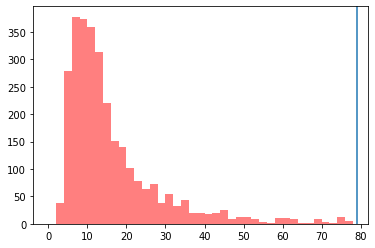

In [ ]:
max_len = 79
temp = np.array(sentence_lengths)
temp_count = len(temp[temp > max_len])
temp_len = len(sentence_lengths)


print(f"Out of the\n{temp_len} total sentences,\n{temp_count} are over the length {max_len},\nTotal of: {(temp_count/temp_len * 100):.2f}%")
print("\n")
print("max length:",max(temp))
print("mean length:",np.mean(sentence_lengths))
print("\n")
n, bins, patches = plt.hist(sentence_lengths, bins=[2 * i for i in range(40)], facecolor='red', alpha=0.5)
_ = plt.axvline(79)

In [12]:
text = df['answer'].tolist()
df = df.drop(['answer'],axis=1)
df = df.fillna(0)
df['text'] = text
df[df.isnull().values==True]
df = df[pd.notnull(df['text'])]
df.head()

,Unnamed: 0,id,time,name,answer_id,comment,support,follower,找朋友,找对象,找炮友,分享,和以上无关,恋爱关系,社交/朋友,性,外貌/长相/身材,地理位置,教育/工作,个人信息,日常生活,无意义,text
0,0,7e89fd170f75416553d793de7c29dfb8,2019-04-18 04:58:51,无状态小黄,655106238,686,1412,5013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,（恋爱了）被喜欢没有什么了不起的，被坚定的选择才值得骄傲。—————————————————...
1,1,80d4369b42aaac894635eb53519d732e,2019-11-21 20:21:26,砖家级打怪兽,904470887,735,777,1158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92年，27岁老叔叔，186cm，80kg。坐标在帝都，有稳定的工作。自己不帅气，但是想活的...
2,2,0,2019-04-27 08:59:44,匿名用户,665004505,175,627,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.24更新开心开心(σﾟ∀ﾟ)σ5.4更新嘻嘻谢谢大家的鼓励和祝福(●´∇｀●)！我们会一...
3,3,1673fe848de163f1dc26be0d0a4b46f3,2020-11-14 02:42:57,王六六,1574149521,343,367,683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,好久没更新了，来更新一下。健身小成果吧https://www.zhihu.com/video...
4,4,b44b26a9b69070306e82921777b73db8,2019-11-14 12:49:34,Vincent,894374357,435,752,10520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,私聊我的朋友们，因为知乎确实不太可能做到及时回复，还请大家见谅。我有时间会一一回复。数据：2...


In [8]:
# Load the BERT tokenizer.
#print('Loading BERT tokenizer...')
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True) # 512max
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096') # 4096max

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/694 [00:00<?, ?B/s]

In [13]:
MAX_LEN = 4096

sentence_lengths = []
def tokenize_and_count(s, lst, max_len):
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    answer = tokenizer.encode(s, add_special_tokens=True)
    lst.append(len(answer))
    
    return answer

df['bert'] = df.text.apply(lambda s : tokenize_and_count(s, sentence_lengths, MAX_LEN))
df['bert_aug'] = df.text.apply(lambda s : tokenize_and_count(s, sentence_lengths, MAX_LEN))


Out of the
994 total sentences,
102 are over the length 4096,
Total of: 10.26%


max length: 21279
mean length: 1810.953722334004




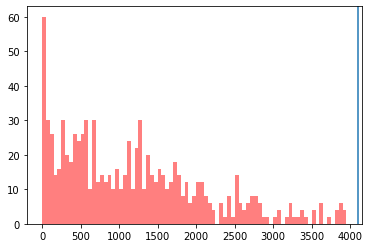

In [14]:
max_len = 4096
temp = np.array(sentence_lengths)
temp_count = len(temp[temp > max_len])
temp_len = len(sentence_lengths)


print(f"Out of the\n{temp_len} total sentences,\n{temp_count} are over the length {max_len},\nTotal of: {(temp_count/temp_len * 100):.2f}%")
print("\n")
print("max length:",max(temp))
print("mean length:",np.mean(sentence_lengths))
print("\n")
n, bins, patches = plt.hist(sentence_lengths, bins=[50 * i for i in range(80)], facecolor='red', alpha=0.5)
_ = plt.axvline(4096)